In [1]:
import numpy as np                                                     # Numerical operations
import pandas as pd                                                    # Working with datasets
from scipy.stats import variation                                      # Coefficient of variation
import seaborn as sns                                                  # Data Visualizations
import matplotlib.pyplot as plt                                        # Data Visualizations
from sklearn.preprocessing import MinMaxScaler ,StandardScaler         # For normalizing,standardizing the data
from sklearn.model_selection import train_test_split,cross_val_score   # for splitting thedata into train and test 
from sklearn.metrics import mean_absolute_percentage_error as MAPE     # mean abs percentage error 
from sklearn.neighbors import KNeighborsRegressor                      # importing K neighbor regressor 

# Data science salary 

In [2]:
# Load dataset
df=pd.read_csv("ds_salaries.csv")

In [3]:
# Top rows
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
# Dimension of dataset
df.shape

(607, 12)

In [5]:
df.size

7284

In [6]:
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [7]:
# checking for duplicated records
df.duplicated().sum()

0

In [8]:
df=df.drop('Unnamed: 0',axis=1)
# the Unnamed: 0 column is a index column so we can drop it

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [10]:
# converting the datatype object to categorical
for col in df:
    if df[col].dtypes=='object':
        df[col]=df[col].astype('category')


In [11]:
df.dtypes

work_year                int64
experience_level      category
employment_type       category
job_title             category
salary                   int64
salary_currency       category
salary_in_usd            int64
employee_residence    category
remote_ratio             int64
company_location      category
company_size          category
dtype: object

In [12]:
# remote ratio is the ratio of how much work is done online and offile premise i.e. 0-none,50-half,100-full

In [13]:
df['remote_ratio']=df['remote_ratio'].astype('category')

In [14]:
# Statistical summary for numerical data
df.describe()

,work_year,salary,salary_in_usd
count,607.000000,6.070000e+02,607.000000
mean,2021.405272,3.240001e+05,112297.869852
std,0.692133,1.544357e+06,70957.259411
min,2020.000000,4.000000e+03,2859.000000
25%,2021.000000,7.000000e+04,62726.000000
50%,2022.000000,1.150000e+05,101570.000000
75%,2022.000000,1.650000e+05,150000.000000
max,2022.000000,3.040000e+07,600000.000000


In [15]:
# Statistical summary for categorical data
df.describe(include=['category'])

,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size
count,607,607,607,607,607,607,607,607
unique,4,4,50,17,57,3,50,3
top,SE,FT,Data Scientist,USD,US,100,US,M
freq,280,588,143,398,332,381,355,326


In [16]:
df['work_year'].value_counts()

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

In [17]:
df_cat=df.select_dtypes(include='category')

In [18]:
df_cat.columns

Index(['experience_level', 'employment_type', 'job_title', 'salary_currency',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [19]:
for col in df_cat:
    u=df[col].nunique()
    v=df[col].value_counts()
    print('\nNumber of unique values is the column',col,'are' ,u,'\nfrequency is given by:\n', v )
    print('-'*90,end='')


Number of unique values is the column experience_level are 4 
frequency is given by:
 SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64
------------------------------------------------------------------------------------------
Number of unique values is the column employment_type are 4 
frequency is given by:
 FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64
------------------------------------------------------------------------------------------
Number of unique values is the column job_title are 50 
frequency is given by:
 Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist   

In [20]:
pd.pivot_table(data=df,index='experience_level',columns='company_size',values='salary_in_usd')

company_size,L,M,S
experience_level,,,
EN,72813.241379,50321.800000,62185.310345
EX,221942.181818,178241.750000,201309.333333
MI,98030.372093,90091.081633,51159.379310
SE,147591.013889,137815.596774,116026.727273


Univariate visualization

[Text(0.5, 1.0, 'Box plot for salary')]

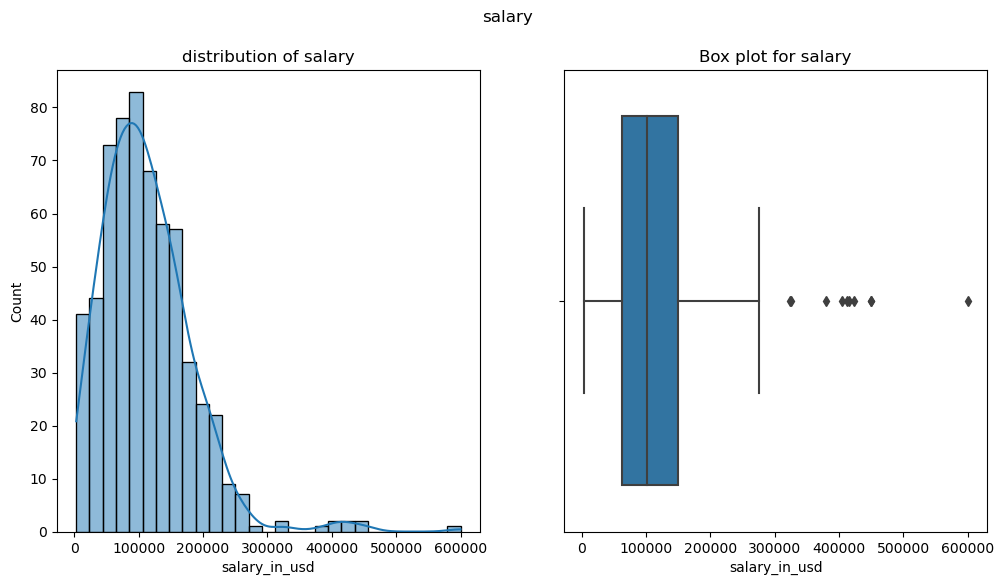

In [21]:
fig,axes=plt.subplots(1,2,figsize=(12,6))
plt.suptitle('salary')
sns.histplot(data=df,x='salary_in_usd',kde=True,ax=axes[0]).set(title='distribution of salary')
sns.boxplot(data=df,x='salary_in_usd').set(title='Box plot for salary')

In [22]:
# the distritbution plots of salaries in USD shows the lowest to highest salarie.
#  there is only a salary which as high as 600k while most of them is around 80-90k.

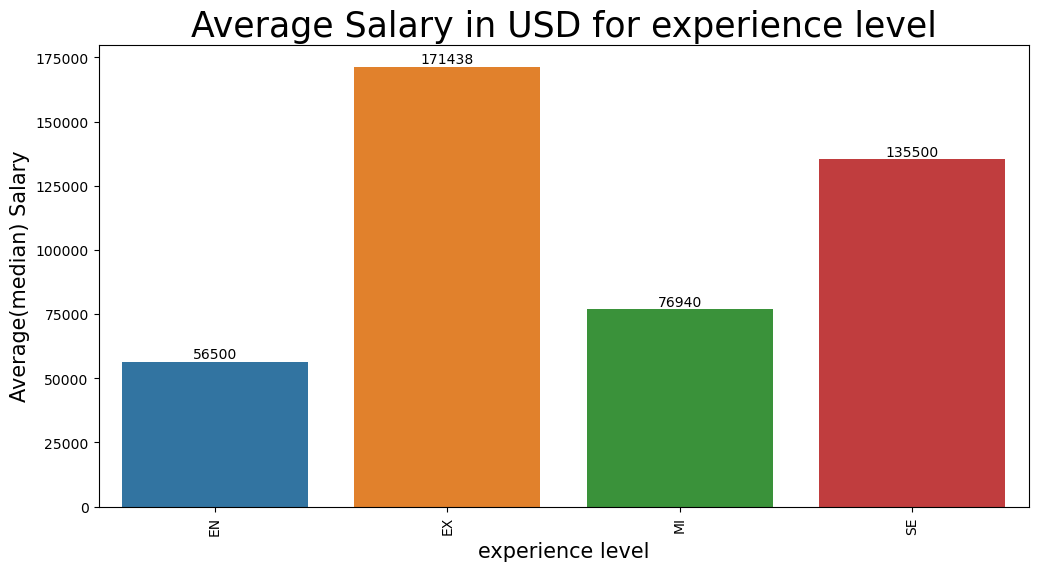

In [23]:
plt.figure(figsize=(12,6))
df_salary=df[['experience_level','salary_in_usd']]
df_salary=df_salary.groupby(['experience_level'])['salary_in_usd'].median().sort_values().reset_index()
g=sns.barplot(x='experience_level',y='salary_in_usd',data=df_salary)
plt.ylabel("Average(median) Salary", size=15)
g.bar_label(g.containers[0])
plt.xlabel('experience level', size=15)
plt.xticks(rotation=90,size=10)
plt.title("Average Salary in USD for experience level",size=25)
plt.show()

In [24]:
# Experience levlel of EX have the highest avg salary

In [25]:
# df_job=df[['job_title','salary_in_usd']]
df_job=df.groupby('job_title')['salary_in_usd'].mean().sort_values().reset_index()


In [26]:
# Which job title in data science field have highest average salary 

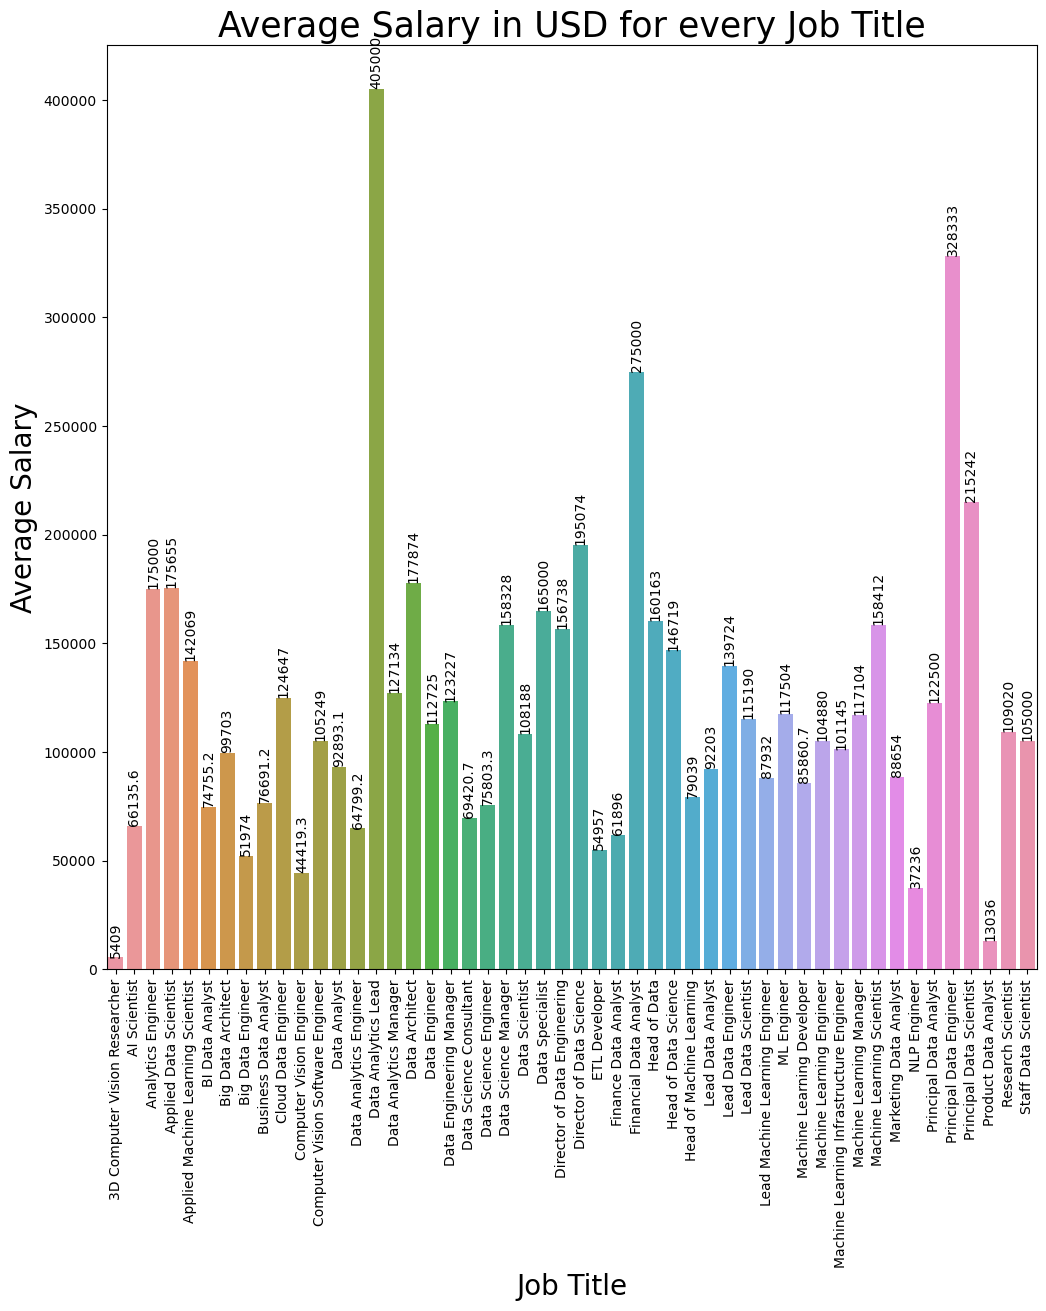

In [27]:
plt.figure(figsize=(12,12))

h=sns.barplot(x=df_job['job_title'],y=df_job['salary_in_usd'],data=df_job)
h.bar_label(h.containers[0],rotation=90)
plt.ylabel("Average Salary", size=20)
plt.xlabel('Job Title', size=20)
plt.xticks(rotation=90)
plt.title("Average Salary in USD for every Job Title", size=25);


In [28]:
job_eur = df[df['salary_currency'] == 'EUR']
job_eur = job_eur.groupby('job_title')['salary'].mean().sort_values(ascending=False).reset_index()

In [30]:
df['employee_residence'].value_counts()

US    332
GB     44
IN     30
CA     29
DE     25
FR     18
ES     15
GR     13
JP      7
PK      6
BR      6
PT      6
NL      5
IT      4
PL      4
RU      4
TR      3
AE      3
VN      3
AT      3
AU      3
BE      2
SI      2
MX      2
RO      2
SG      2
NG      2
HU      2
DK      2
TN      1
CL      1
RS      1
UA      1
BG      1
PR      1
BO      1
CH      1
PH      1
NZ      1
EE      1
MY      1
DZ      1
MT      1
MD      1
LU      1
KE      1
CN      1
JE      1
CO      1
IR      1
AR      1
CZ      1
IE      1
HR      1
HN      1
HK      1
IQ      1
Name: employee_residence, dtype: int64

In [31]:
# which employee residence have highest salary 

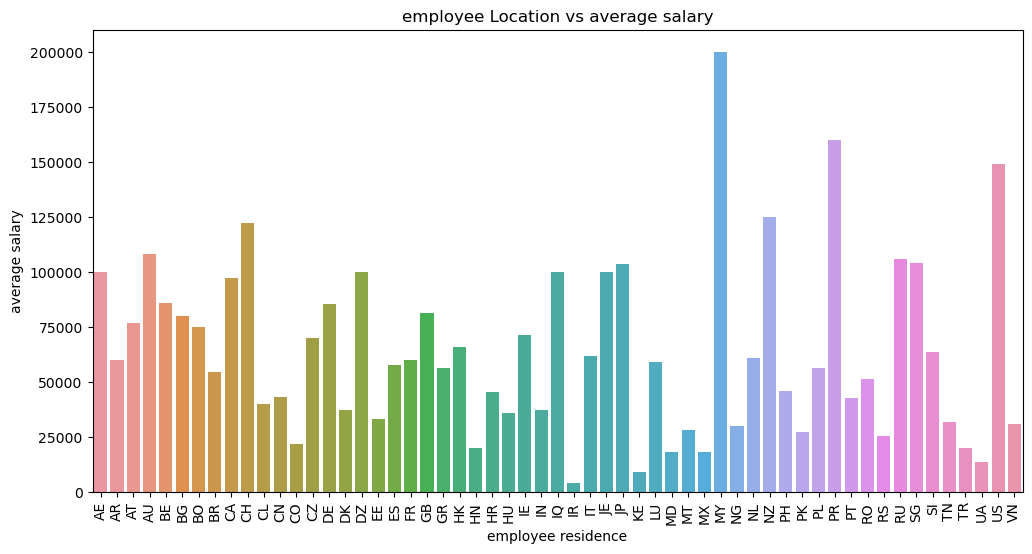

In [32]:
emp_resbysalary= df.groupby(['employee_residence'])['salary_in_usd'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='employee_residence',y='salary_in_usd',data=emp_resbysalary.sort_values(by=['salary_in_usd']))
plt.title('employee Location vs average salary')
plt.ylabel('average salary')
plt.xlabel('employee residence')
plt.xticks(rotation=90)
plt.show()

In [33]:
# does working remotely or inoffice effects the salary

<Axes: xlabel='remote_ratio', ylabel='salary_in_usd'>

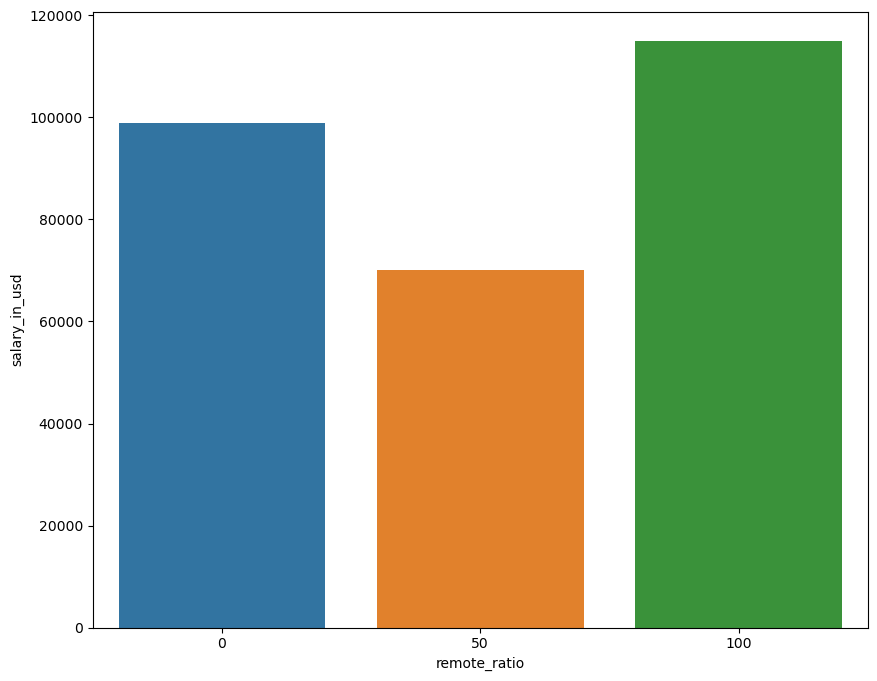

In [34]:
remote_salary=df.groupby(['remote_ratio'])['salary_in_usd'].median().sort_values().reset_index()
plt.figure(figsize=(10,8))
sns.barplot(x='remote_ratio',y='salary_in_usd',data=remote_salary)

In [35]:
# which employee residence have highest average salary

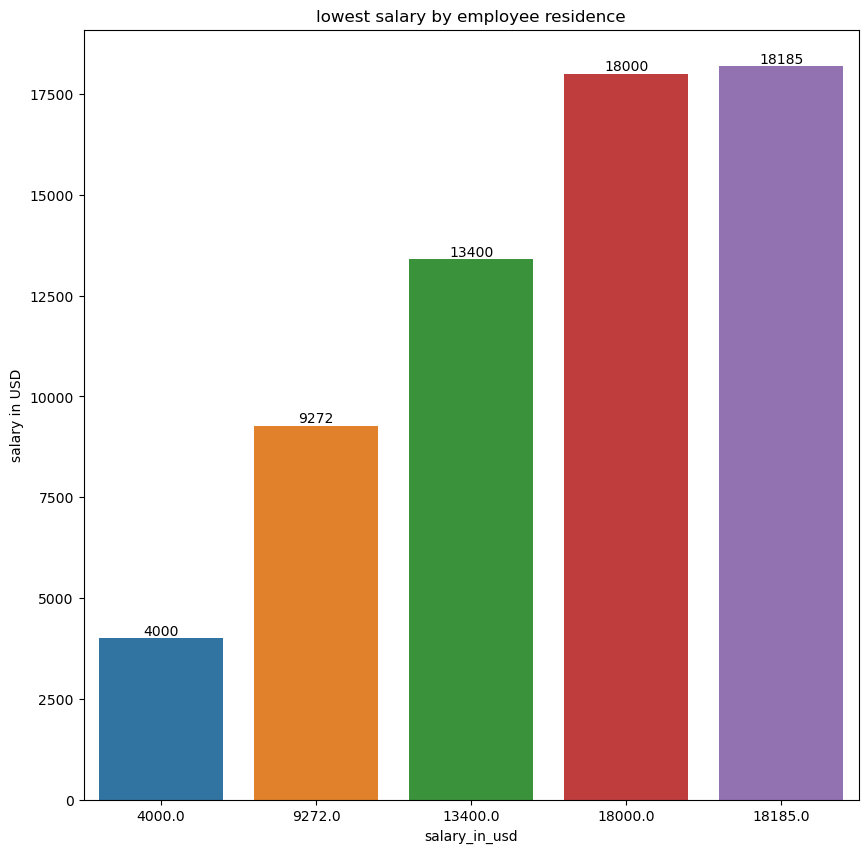

In [36]:
res1 = df.groupby('employee_residence').salary_in_usd.mean().sort_values(ascending=True)
res1 = res1.head()
plt.figure(figsize=(10,10))
i=sns.barplot(x=res1.index, y=res1.values,data=res1.sort_values())
i.bar_label(i.containers[0])
plt.title('lowest salary by employee residence')
plt.ylabel('salary in USD')
plt.show()

In [37]:
# does company size effects salary

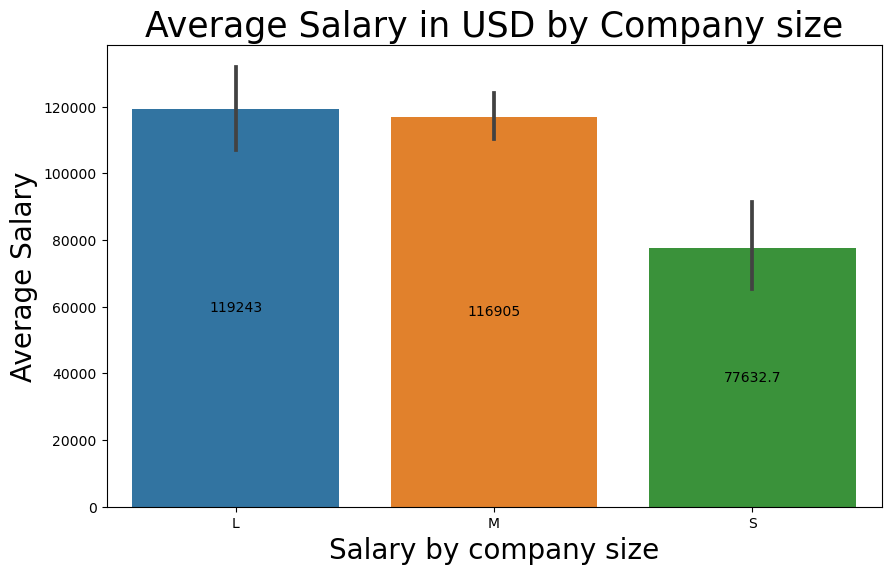

In [38]:
plt.figure(figsize=(10,6))
k=sns.barplot(x=df['company_size'], y=df['salary_in_usd'], data=df)
k.bar_label(k.containers[0],label_type='center')
plt.ylabel("Average Salary", size=20)
plt.xlabel('Salary by company size', size=20)
plt.xticks()
plt.title("Average Salary in USD by Company size", size=25);
plt.show()

In [39]:
# distribution of remotly working jobs

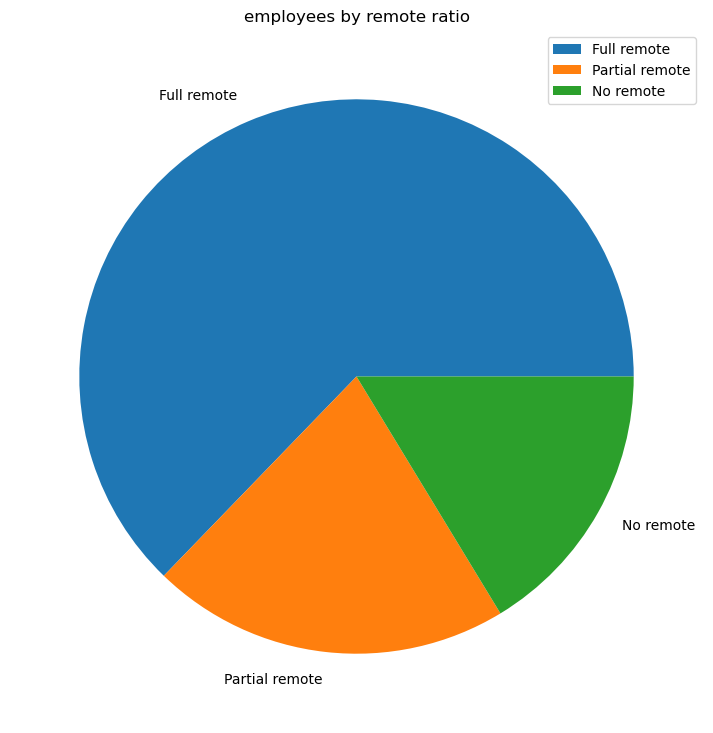

In [40]:
remo = np.array(df['remote_ratio'].value_counts(sort=True))
labels = ['Full remote', 'Partial remote', 'No remote']
plt.figure(figsize=(9,9))
plt.pie(remo, labels=labels)
plt.legend()
plt.title('employees by remote ratio')
plt.show()

In [41]:
df.groupby(['experience_level']).median()

C:\Users\admin\AppData\Local\Temp\ipykernel_23428\635303160.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['experience_level']).median()


,work_year,salary,salary_in_usd
experience_level,,,
EN,2021.0,68500.0,56500.0
EX,2021.5,187500.0,171437.5
MI,2021.0,85000.0,76940.0
SE,2022.0,140000.0,135500.0


In [42]:
df=df.drop(['salary','salary_currency'],axis=1)

In [43]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [44]:
# label
y=df[['salary_in_usd']]

In [45]:
X_cat=df.drop(['salary_in_usd'],axis=1)

In [46]:
X_cat.head()

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,US,50,US,L


In [47]:
# One-hot encoding:
X = pd.get_dummies(X_cat, drop_first=False, dtype=int)

In [48]:
X.head()

,work_year,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,job_title_3D Computer Vision Researcher,...,company_location_RU,company_location_SG,company_location_SI,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_size_L,company_size_M,company_size_S
0,2020,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2020,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2020,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2020,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2020,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0


In [49]:
X.describe()

,work_year,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,job_title_3D Computer Vision Researcher,...,company_location_RU,company_location_SG,company_location_SI,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_size_L,company_size_M,company_size_S
count,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,...,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000
mean,2021.405272,0.144975,0.042834,0.350906,0.461285,0.008237,0.006590,0.968699,0.016474,0.001647,...,0.003295,0.001647,0.003295,0.004942,0.001647,0.584843,0.001647,0.326194,0.537068,0.136738
std,0.692133,0.352366,0.202649,0.477647,0.498910,0.090459,0.080976,0.174275,0.127396,0.040589,...,0.057354,0.040589,0.057354,0.070186,0.040589,0.493155,0.040589,0.469206,0.499035,0.343854
min,2020.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2022.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,2022.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,2022.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print(f'dimension of X train data is:{X_train.shape}\
\ndimension of X test data is:{X_test.shape}\
\ndimension of Y train data is:{y_train.shape}\
\ndimension of Y test data is:{y_test.shape}')

dimension of X train data is:(424, 172)
dimension of X test data is:(183, 172)
dimension of Y train data is:(424, 1)
dimension of Y test data is:(183, 1)


In [51]:
# Train the model with different K values and calculate MAPE scores using CV
k_values = np.arange(1, 15, 2)
cv_mape_scores = []
train_mape_scores = []
test_mape_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # Calculating CV MAPE using cross-validation (CV) with full X and y
    cv_scores = -cross_val_score(knn, X, y, cv=5, scoring='neg_mean_absolute_percentage_error')
    cv_mape = np.mean(cv_scores)
    cv_mape_scores.append(cv_mape)
    
    # Training the model on the full training set and calculate train MAPE
    knn.fit(X_train, y_train)
    train_pred = knn.predict(X_train)
    train_mape = MAPE(y_train, train_pred)
    train_mape_scores.append(train_mape)
    
    # Calculating test MAPE
    test_pred = knn.predict(X_test)
    test_mape = MAPE(y_test, test_pred)
    test_mape_scores.append(test_mape)

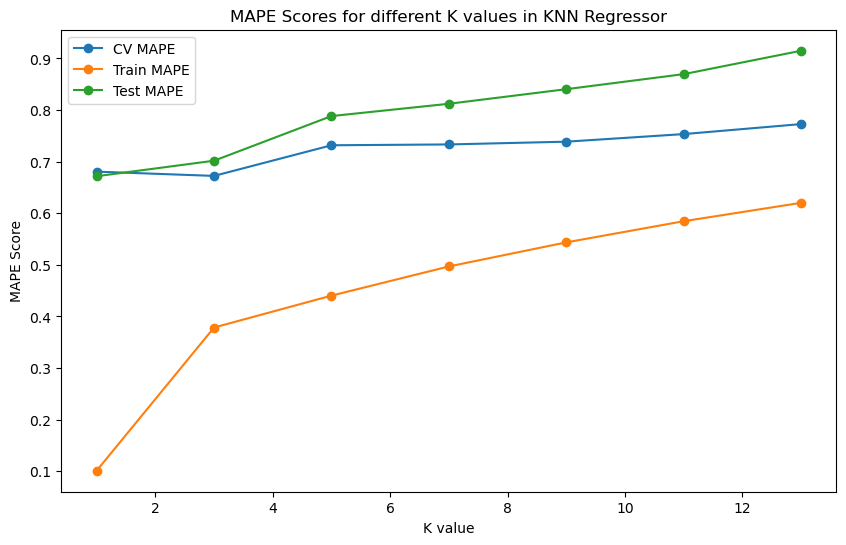

The best K value for CV is 3.


In [52]:
# Ploting CV MAPE, Train MAPE, and Test MAPE for different K values
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_mape_scores, marker='o', label='CV MAPE')
plt.plot(k_values, train_mape_scores, marker='o', label='Train MAPE')
plt.plot(k_values, test_mape_scores, marker='o', label='Test MAPE')
plt.xlabel('K value')
plt.ylabel('MAPE Score')
plt.title('MAPE Scores for different K values in KNN Regressor')
plt.legend()
plt.show()

# Comparing the best K value for CV
best_k_cv = k_values[np.argmin(cv_mape_scores)]
print(f"The best K value for CV is {best_k_cv}.")